In [1]:
# Fuentes y recursos:
# http://www.r-tutor.com/elementary-statistics/simple-linear-regression

# Utilizaremos como ejemplo el conjunto de datos faithful que
# consiste en una colección de observaciones del géiser Old Faithful 
# en el Parque Nacional de Yellowstone de los EE.UU.
# Contiene una muestra de dos variables aleatorias 
#  waiting: tiempo de espera hasta la próxima erupción (en minutos), y
#  eruptions: tiempo de duración de las erupciones (en minutos).

head(faithful)

eruptions,waiting
<dbl>,<dbl>
3.600,79
1.800,54
3.333,74
2.283,62
4.533,85
2.883,55


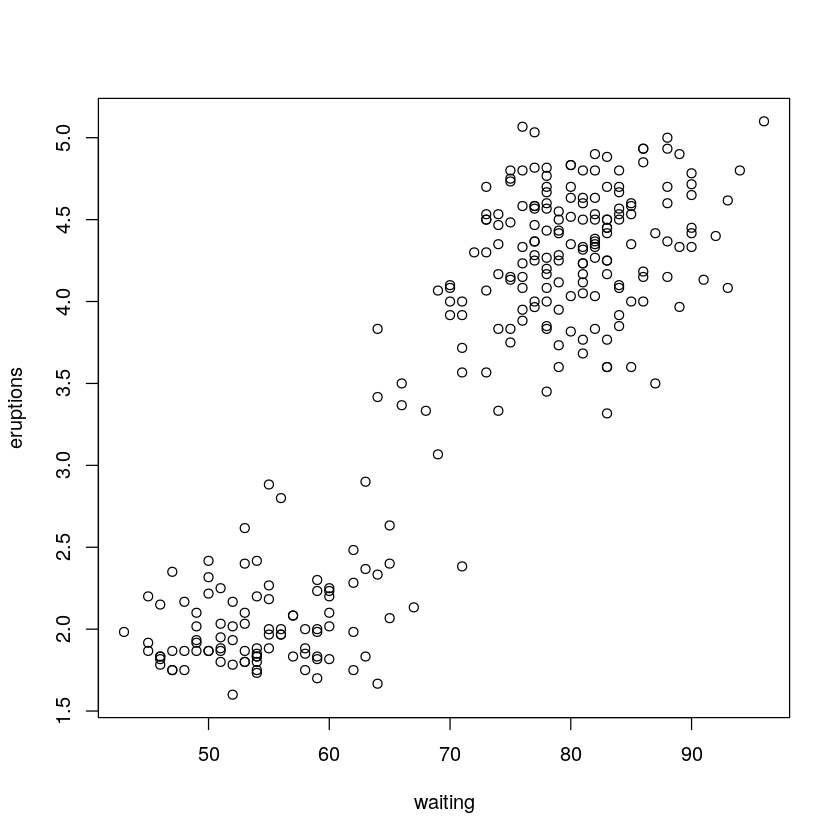

In [2]:
plot(faithful[c(2,1)])

In [3]:
# Construiremos un modelo de regresión lineal:
# eruptions = α + β*waiting + ϵ
# α y β son los parámetros de la regresión
# ϵ el término del error.

# Problema
# Aplique el modelo de regresión lineal simple para el 
# conjunto de datos faithful y calcule la duración de la erupción 
# si el tiempo de espera desde la última erupción fue de 80 minutos.

# Construimos el modelo lineal y guardamos en eruption.lm
eruption.lm <- lm(eruptions ~ waiting, data=faithful)

# Podemos ver los coeficientes del modelo resultante
coeffs = coefficients(eruption.lm); coeffs

(Intercept)     waiting 
-1.87401599  0.07562795

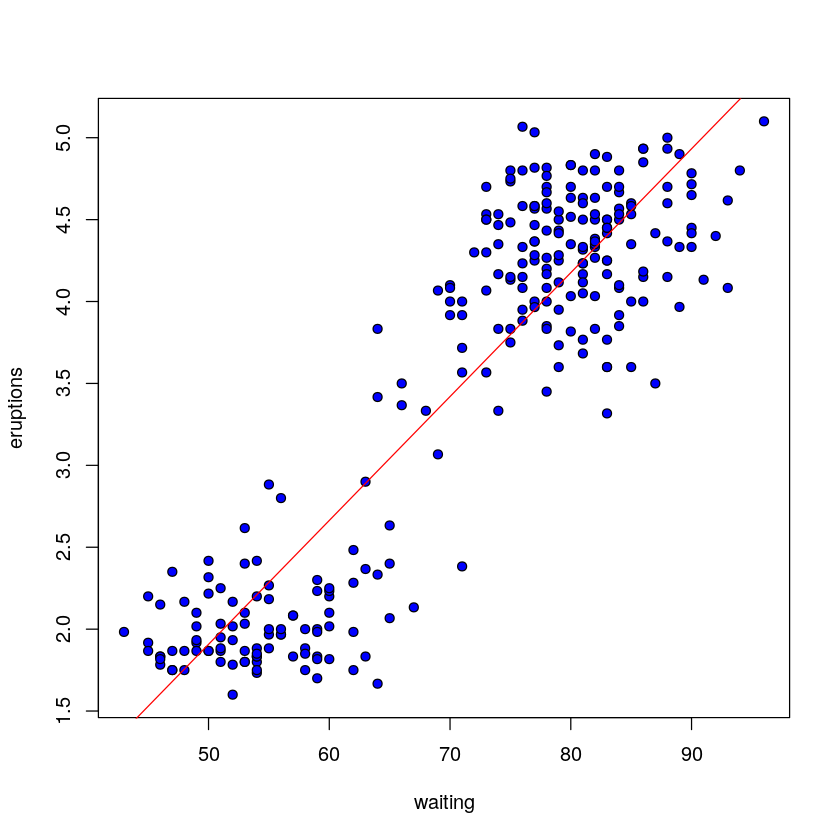

In [4]:
# Graficaremos el modelo junto a los datos
plot(faithful[c(2,1)], pch=21, bg="blue")
abline(eruption.lm, col="red")

In [5]:
# Ajustamos la duración de la erupción usando 
# la ecuación de regresión estimada, para w = 80 minutos,
# de acuerdo al problema anterior.

waiting = 80
duration = coeffs[1] + coeffs[2]*waiting
duration

# Según el modelo de regresión lineal simple, 
# si el tiempo de espera desde la última erupción 
# ha sido de 80 minutos, esperamos que la próxima
# erupción dure 4.1762 minutos.

(Intercept) 
    4.17622

In [6]:
# Podemos aplicar la función predicción sobre un conjunto de datos
newdata = data.frame(waiting=c(80, 78, 90)) 
head(newdata)

predict(eruption.lm, newdata)

waiting
<dbl>
80
78
90


1        2        3 
4.176220 4.024964 4.932499

In [7]:
# Coeficiente de determinación
# https://onlinecourses.science.psu.edu/stat501/node/255

# El coeficiente de determinación de un modelo 
# de regresión lineal es el cociente de las varianzas 
# de los valores ajustados y los valores observados 
# de la variable dependiente.

summary(eruption.lm)$r.squared

# 81% de la variación de eruptions es explicada por waiting

[1] 0.8114608

In [8]:
# Prueba de significancia para regresión lineal simple

# Podemos decidir si existe una relación 
# significativa entre x e y, al probar la hipótesis nula de que β = 0.

# Problema
# Decida si existe una relación significativa entre las variables 
# en el modelo de regresión lineal del conjunto de datos faithful al 
# nivel de significancia de .05.

summary(eruption.lm) 

# Podemos ver en el resultado de summary del modelo
# el valor para el estadístico F del test de significancia
# (útlima línea).

# Como el valor de p es mucho menor que 0.05, 
# rechazamos la hipótesis nula de que β = 0. 
# Por lo tanto, existe una relación significativa 
# entre las variables en el modelo de regresión 
# lineal del conjunto de datos faithful.


Call:
lm(formula = eruptions ~ waiting, data = faithful)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.29917 -0.37689  0.03508  0.34909  1.19329 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.874016   0.160143  -11.70   <2e-16 ***
waiting      0.075628   0.002219   34.09   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4965 on 270 degrees of freedom
Multiple R-squared:  0.8115,	Adjusted R-squared:  0.8108 
F-statistic:  1162 on 1 and 270 DF,  p-value: < 2.2e-16


In [9]:
# Intervalo de confianza

# Problema
# En el conjunto de datos faithful, 
# construya un intervalo de confianza del 95% 
# de la duración media de la erupción para el tiempo de espera de 80 minutos.

# Para un valor dado de x, la estimación del intervalo para 
# la media de la variable dependiente y, se denomina intervalo de confianza.

newdata = data.frame(waiting=80)

predict(eruption.lm, newdata, interval="confidence", level=0.95) 

#El intervalo de confianza del 95% de la duración 
# media de la erupción para el tiempo de espera de 80 
# minutos está entre 4.1048 y 4.2476 minutos.

fit,lwr,upr
4.17622,4.104848,4.247592


In [10]:
# Intervalo de Predicción 

# Problema
# En el conjunto de datos faithful, 
# construya un intervalo de predicción del 95% 
# de la duración de la erupción para el tiempo de espera de 80 minutos.

# Para un valor dado de x, la estimación del intervalo 
# de la variable dependiente se denomina intervalo de predicción.

predict(eruption.lm, newdata, interval="predict", level=0.95) 

# El intervalo de predicción del 95% de la duración 
# de la erupción para el tiempo de espera de 80 minutos 
# es entre 3.1961 y 5.1564 minutos.

fit,lwr,upr
4.17622,3.196089,5.156351


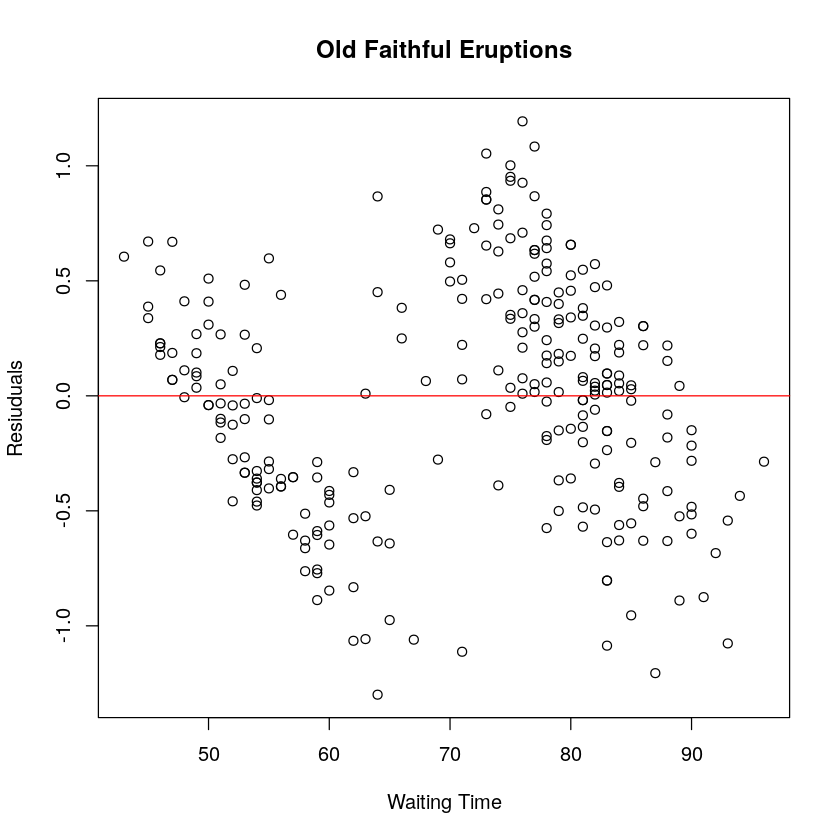

In [11]:
# Análisis de residuos

# Los valores residuales del modelo de regresión lineal 
# simple es la diferencia entre los datos observados 
# de la variable dependiente y y los valores ajustados ŷ.

# Problema
# Grafique el residuo del modelo de regresión lineal simple
# del conjunto de datos faithful contra la variable independiente waiting.

eruption.lm <- lm(eruptions ~ waiting, data=faithful) # No es necesario duplicar
eruption.res <- resid(eruption.lm)

plot(faithful$waiting, eruption.res,
     ylab="Resiuduals", xlab="Waiting Time", 
     main="Old Faithful Eruptions") 
abline(0, 0, col="red") 

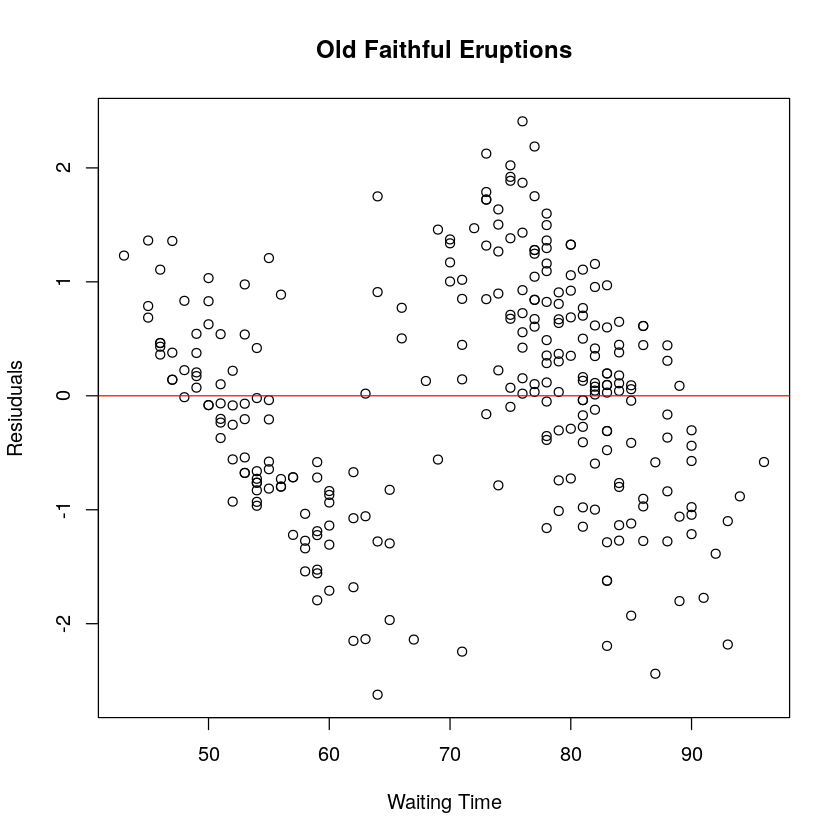

In [12]:
# Residuos estandarizados
eruption.stdres = rstandard(eruption.lm)

plot(faithful$waiting, eruption.stdres,
     ylab="Resiuduals", xlab="Waiting Time", 
     main="Old Faithful Eruptions") 
abline(0, 0, col="red") 

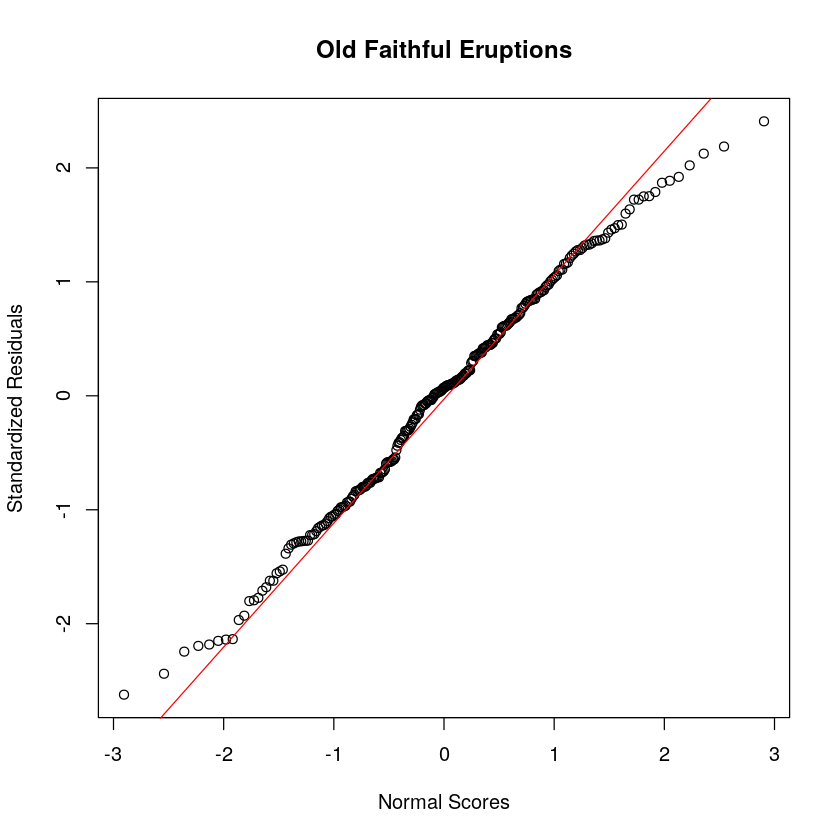

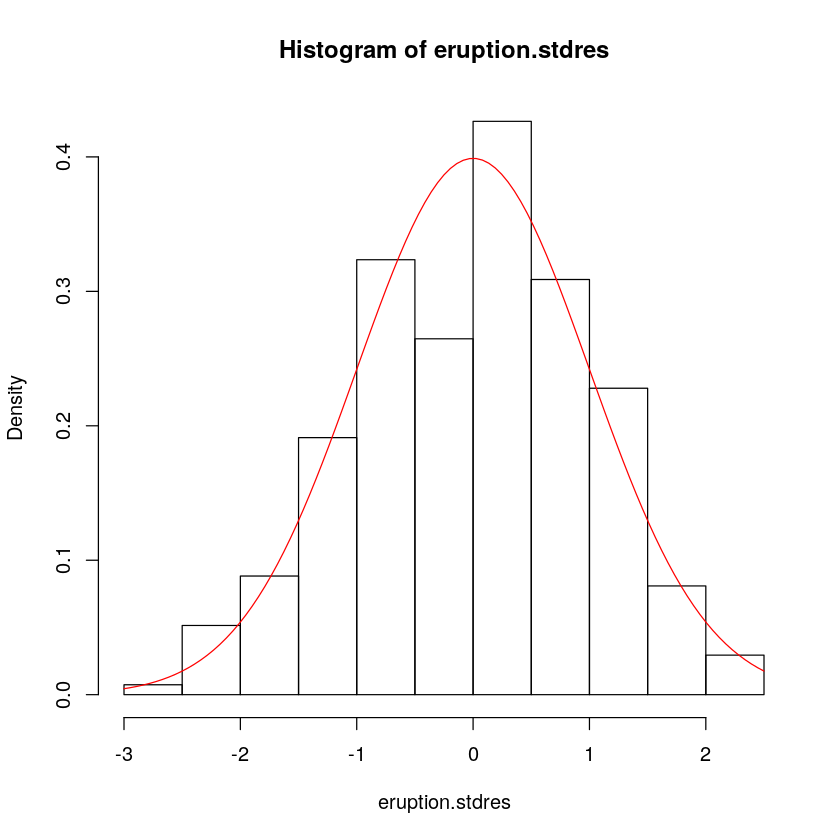

In [13]:
# Hemos construido los intervalos de confianza y de predicción bajo
# ciertos supuestos. 
# Uno de ellos es que los errores ϵ están normalmente distribuidos

# Problema
# Cree el gráfico de probabilidad normal para el 
# residuo estandarizado del conjunto de datos faithful.

qqnorm(eruption.stdres, 
     ylab="Standardized Residuals", 
     xlab="Normal Scores", 
     main="Old Faithful Eruptions") 
qqline(eruption.stdres, col="red")

hist(eruption.stdres, freq = F)

x<-seq(-3,3,by=0.02)
curve(dnorm(x), add=TRUE, col="red")

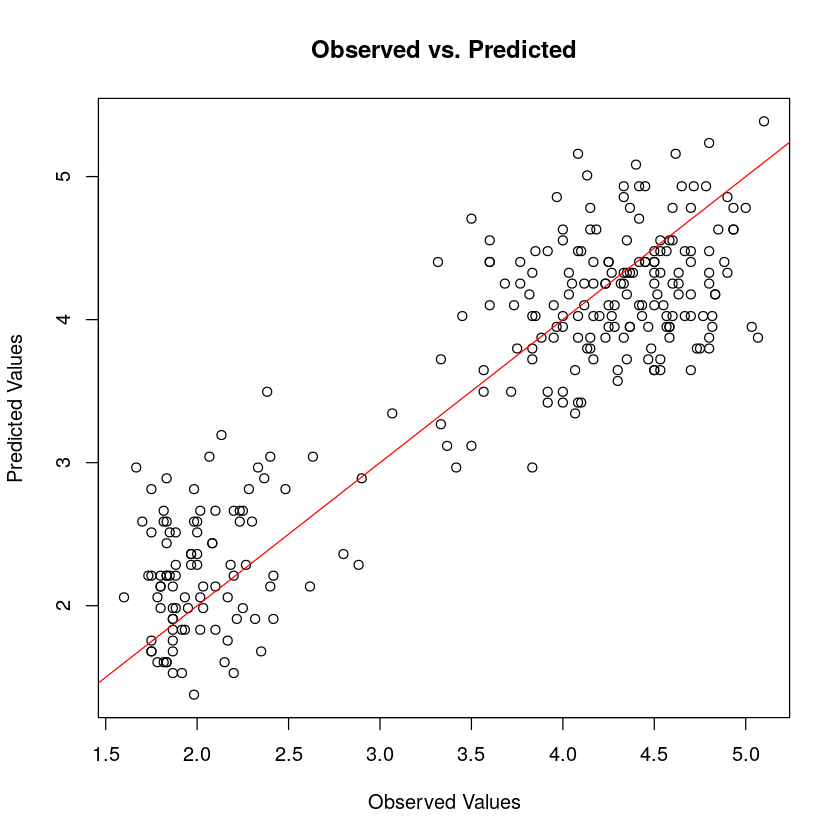

In [14]:
# Para finalizar graficaremos los valores ajustados vs. observados
plot(faithful$eruptions,eruption.lm$fitted.values, 
     xlab="Observed Values", ylab="Predicted Values",
     main="Observed vs. Predicted")
abline(0, 1, col="red") 